# Errors

Precaustions for roundoff and truncation errors:
- Double precision: better aproximation due to having more bits.
- Employ formulas that are accurate to atleast $O(h^2)$.

Extra precision to decrease roundoff errors.

# Numerical integration

Methods can be divided into two groups:
- Newton-Cotes formulas
    - characterized by equally spaced abscissas.
    - most useful if $f(x)$ has already been computed at equal intervals.
    - based on local interpolation, they require only a piecewise fit to a polynomial.
    - good if costs of $f(x)$ are low.
- Gaussian quadrature
    - locations of abscissas chosen to yield best possible accuracy.
    - popular if $f(x)$ is expensive to evaluate.

# Root finding
Given a function $f(x)$, determine the values of $x$ for which $f(x)=0$.

The solutions are known as the roots of $f(x)=0$.

Problems with incremental search method:
- It is possible to miss two closely spaced roots if the search incremented $\Delta x$ is larger than the spacing of the roots.
- A double root (two roots that coincide) will not be detected
- Certain singularities of $f(x)$ can be mistaken for roots. This can happen for $f(x)=tan(x)$ because it changes sign at $x=±\frac{1}{2}n\pi, n=1, 3, 5, ...$ However, they are not true zeroes, because the function does not cross the x-axis.

Incremental search:
- To obtain four-digit accuracy, we need a search increment no bigger than $\Delta x = 0.0001$

bisection:
- optimal number of bisection:

$$
n = \frac{ln(\Delta x / \epsilon)}{ln2}
$$

if tol $= 1.0e-4$, then $\epsilon = 0.0001$.

$$
n = \frac{ln(\Delta x / \epsilon)}{ln2} = \frac{ln(1.0/0.0001}{ln2} = 13.29
$$

For a function that is not susceptible to singularities. See book page 150.

Secant method vs false position method:
- Does nto require prior bracketing
- Discards oldest prior estimate of root.

# Optimization
Minimizing or maximizing a function.

You can only consider minimizing, because maximization is done by minimizing $-F(x)$.



# Initial value problems
A *n*th order method would use the truncated Taylor series, where *O(h$^n$)*

In [8]:
# vector proof

import numpy as np
import matplotlib.pyplot as plt

def euler(F, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    
    while x < xStop:
        h = min(h, xStop - x)
        y = y + h*F(x, y)
        x = x + h
        X.append(x)
        Y.append(y)
        
    return np.array(X), np.array(Y)

In [5]:
def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

In [7]:
x0 = 0.0
x1 = 2.0
y0 = np.array([0.0, 1.0])
h = 0.05

xs, ys = euler(F, x0, y0, x1, h)

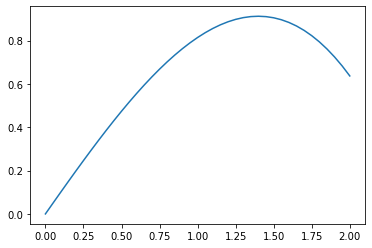

In [10]:
plt.plot(xs, ys[:, 0])